# Algerian Forest Fire EDA Practical Implementation

# Submitted by - Pranav Kumawat

# Life cycle of Machine learning Project


 .Understanding the Problem Statement

.Data Collection

.Data Cleaning

.Exploratory data analysis

.Data Pre-Processing

.Model Training.

.Choose best model

# 1) Problem statement.

a)The dataset Comprises of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

b)If User can Predict that Algerian Forest will Catch Fire or Not based on Input Features.

c)Prediction result can be used for Forest Fire Situation Tackers & Make Correct Preventions to Avoid it in future.

# 2) Data Collection.

a)The Dataset is collected from Website named, UCI Machine Learning Repository. 

b)The data consists of 15 columns and 244 rows.

In [4]:
#Importing Pandas ,Numpy,Matplotlib,Seaborn and Warnings Library

# 2.1 Import Data and Required Packages

In [5]:
# Importing required libraries for EDA
# The main aim is to understand data in better way

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
#Loading the csv data as Pandas DataFrame

In [17]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [19]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [20]:
df.head()
#Shows top five Rows

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Data Cleaning

In [24]:
df.isnull().sum()


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [25]:
df[120:130]
#here we can see that row no 122 is having nan value and there is nothing but blank rows and in row no 123 we can see all the header term so lets removeit

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [32]:
#Removing the blank rows
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)


In [34]:
df.head()

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Here lets make one more columns and lets replace 2 terms "Bejaia Region Dataset" and "Sidi-Bel Abbes Region Dataset"

In [36]:
df.loc[:122,'Region']="Bejaia"
df.loc[122:,'Region']="Sidi-Bel Abbes"
df

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
234,240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
235,241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
236,242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [38]:
df.isnull().sum()

level_0        0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [39]:
df['Classes  '].fillna(df['Classes  '].mode()[0],inplace=True)
df.head()

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [42]:
df.isnull().sum()
#there are no null value after replacing with mode values


level_0        0
day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [48]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [49]:
df['Classes  '].replace(['not fire ', 'fire '],
                        [0, 1], inplace=True)

In [50]:
df['Classes  '].replace(['not fire    ', 'not fire     '],
                        [0, 0], inplace=True)

In [51]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 1, 'not fire', 0], dtype=object)

In [52]:
df['Classes  '].replace(['not fire   ', 'fire   '],
                        [0, 1], inplace=True)

In [53]:
df['Classes  '].replace(['not fire', 'fire'],
                        [0, 1], inplace=True)

In [54]:
df['Classes  '].unique()

array([0, 1], dtype=int64)

In [56]:
df.head()
#Here we can see that it carries all spaces on the values so we can replaced

,level_0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bejaia
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,Bejaia
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bejaia
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,Bejaia
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,Bejaia


In [57]:
df['year'].unique()

array(['2012'], dtype=object)

In [60]:
df['month'].unique()
#Here from all the data which is provided in the month of june,july,august,september,and the year 2012 and the day,month,and year is unwanted column so lets remove it

array(['06', '07', '08', '09'], dtype=object)

# Removing the unwanted columns and relaced

In [61]:
df['date']=pd.to_datetime(df[['day','month','year']])

In [62]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [65]:
df.drop(['level_0'],axis=1,inplace=True)

In [66]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,Bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,Bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,Bejaia,2012-06-05


# Changing the Datatype

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  238 non-null    object        
 1    RH          238 non-null    object        
 2    Ws          238 non-null    object        
 3   Rain         238 non-null    object        
 4   FFMC         238 non-null    object        
 5   DMC          238 non-null    object        
 6   DC           238 non-null    object        
 7   ISI          238 non-null    object        
 8   BUI          238 non-null    object        
 9   FWI          238 non-null    object        
 10  Classes      238 non-null    int64         
 11  Region       238 non-null    object        
 12  date         238 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 24.3+ KB


In [71]:
df.columns
#Here some of columns contains spaces so lets remove it and change its Datatypes

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'Region', 'date'],
      dtype='object')

In [73]:
df.rename(columns={'Rain ':'Rain'},inplace=True)
df.rename(columns={' RH':'RH'},inplace=True)
df.rename(columns={' Ws':'Ws'},inplace=True)
df.rename(columns={'Classes  ':'Classes'},inplace=True)

In [74]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

In [75]:
df=df.astype({'Temperature':int, 'RH':int, 'Ws':int})

In [76]:
df=df.astype({'Rain':float, 'FFMC':float, 'DMC':float})

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  238 non-null    int32         
 1   RH           238 non-null    int32         
 2   Ws           238 non-null    int32         
 3   Rain         238 non-null    float64       
 4   FFMC         238 non-null    float64       
 5   DMC          238 non-null    float64       
 6   DC           238 non-null    object        
 7   ISI          238 non-null    object        
 8   BUI          238 non-null    object        
 9   FWI          238 non-null    object        
 10  Classes      238 non-null    int64         
 11  Region       238 non-null    object        
 12  date         238 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(3), int64(1), object(5)
memory usage: 21.5+ KB


# Numerical and Categorical Columns

In [78]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Numerical feature",numeric_features)
print("categorical feature",categorical_features)

Numerical feature ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'Classes', 'date']
categorical feature ['DC', 'ISI', 'BUI', 'FWI', 'Region']


# Univariate Analysis

In [80]:
#Here the univariate Analysis is known as one variable prefix"uni" means one. The purpose of univariate analysis is to understand the distribution of values for single variable

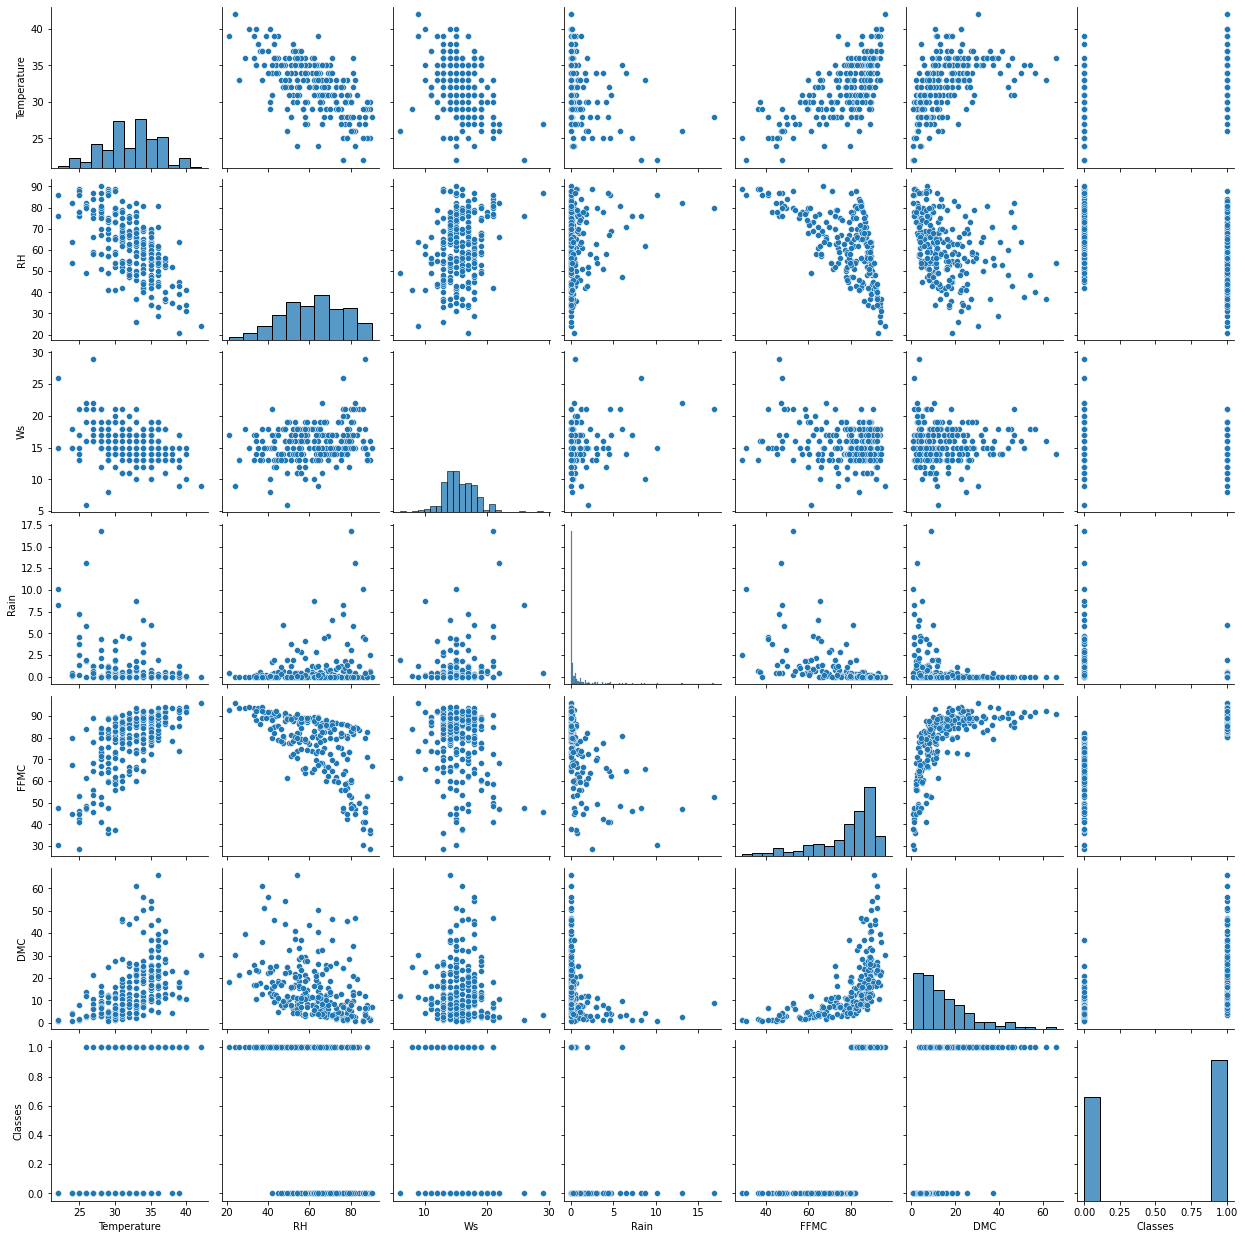

In [81]:
sns.pairplot(df)

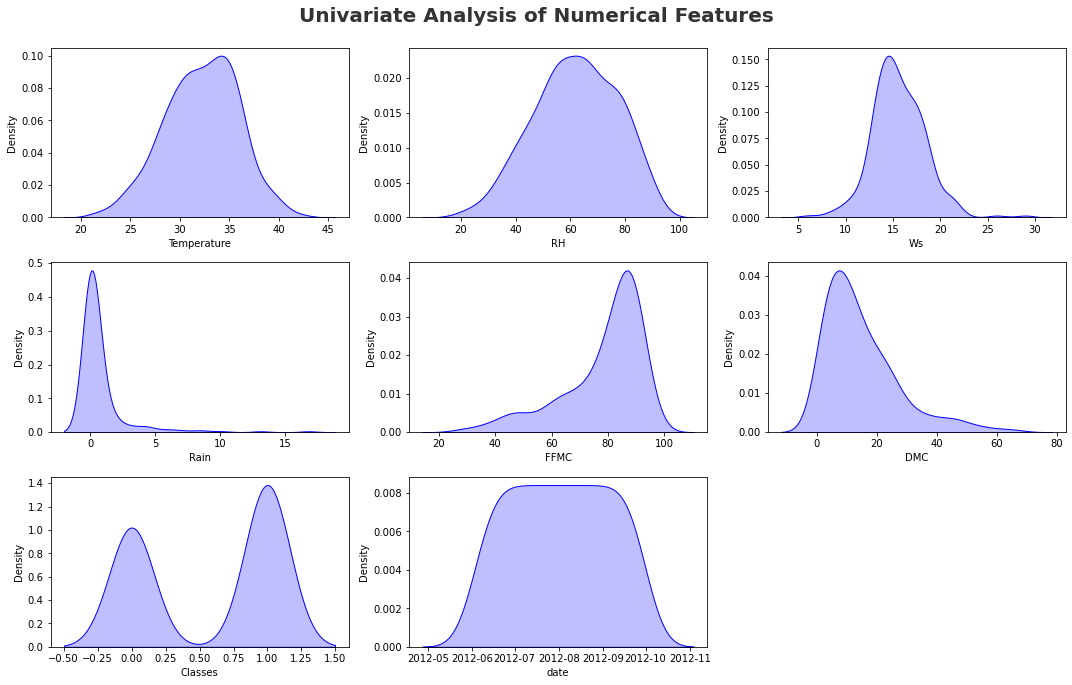

In [82]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

1) Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 and its normally distributed 2)RH : Relative Humidity in %: 21 to 90 and its normally distributed 3) Ws :Wind speed in km/h: 6 to 29 since it looks like it is normally distributed but outliers is present 4) Rain: total day in mm: 0 to 16.8 as it is right skewed data and even ouliers is present FWI Components 5) Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 as it is left skewed data and even ouliers is present 6)Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 as it is right skewed data and even ouliers is present 7) Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 as it is right skewed data and even ouliers is present 8) Buildup Index (BUI) index from the FWI system: 1.1 to 68 as it is right skewed data and even ouliers is present

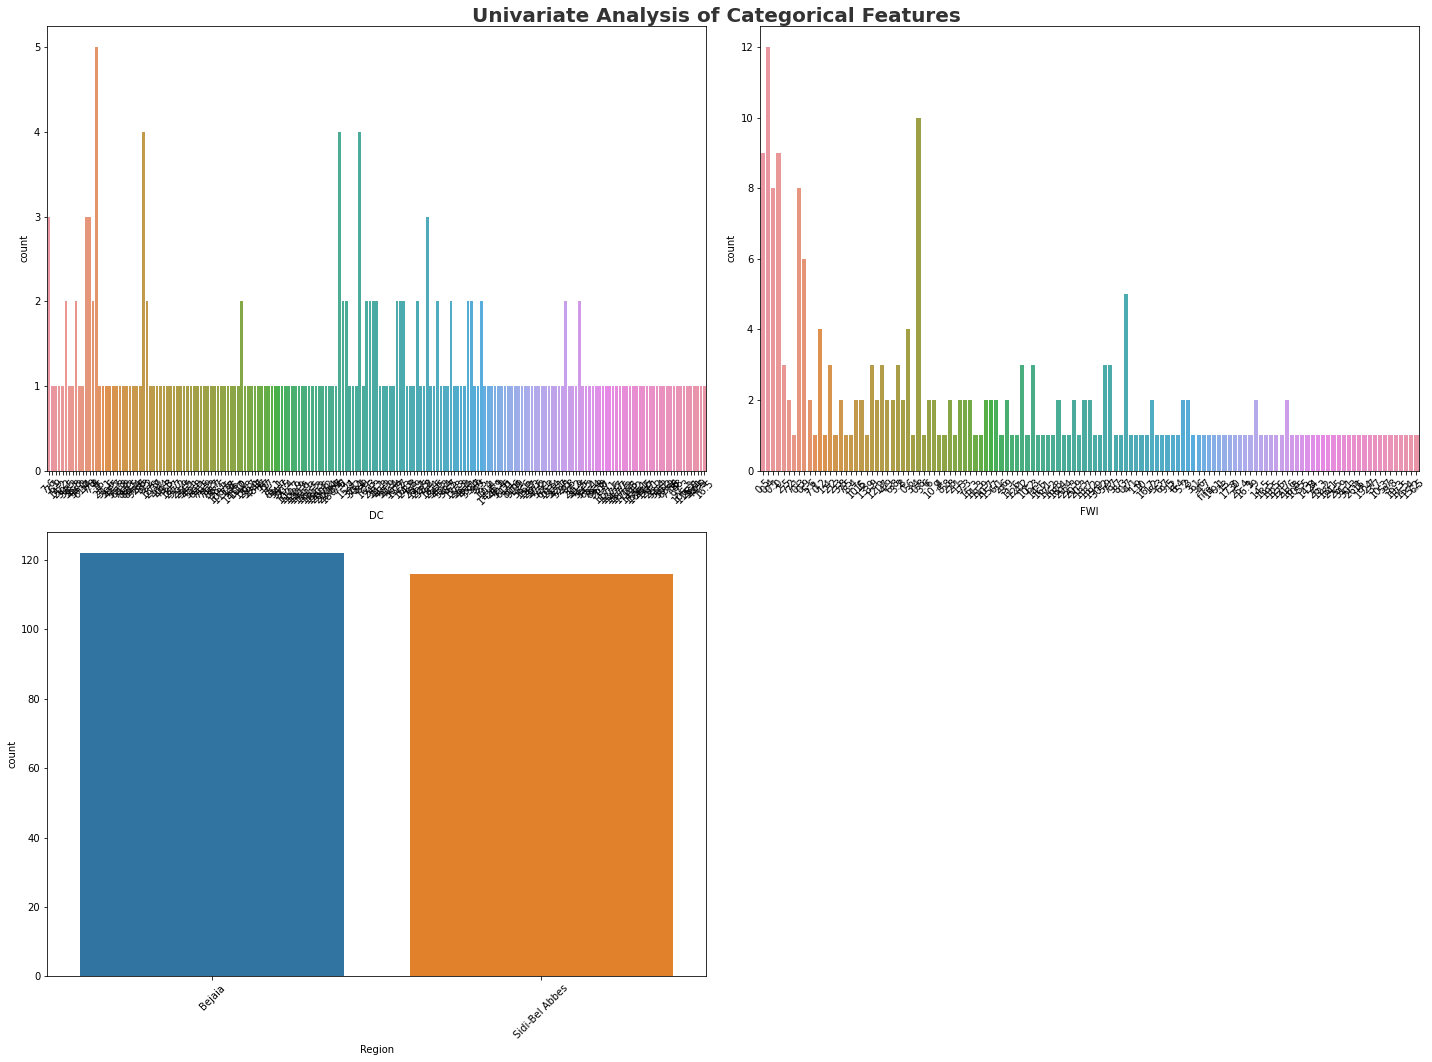

In [83]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8 )
cat1 = ['DC', 'FWI', 'Region']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Analytics between rain and fire

<AxesSubplot:xlabel='Region', ylabel='Classes'>

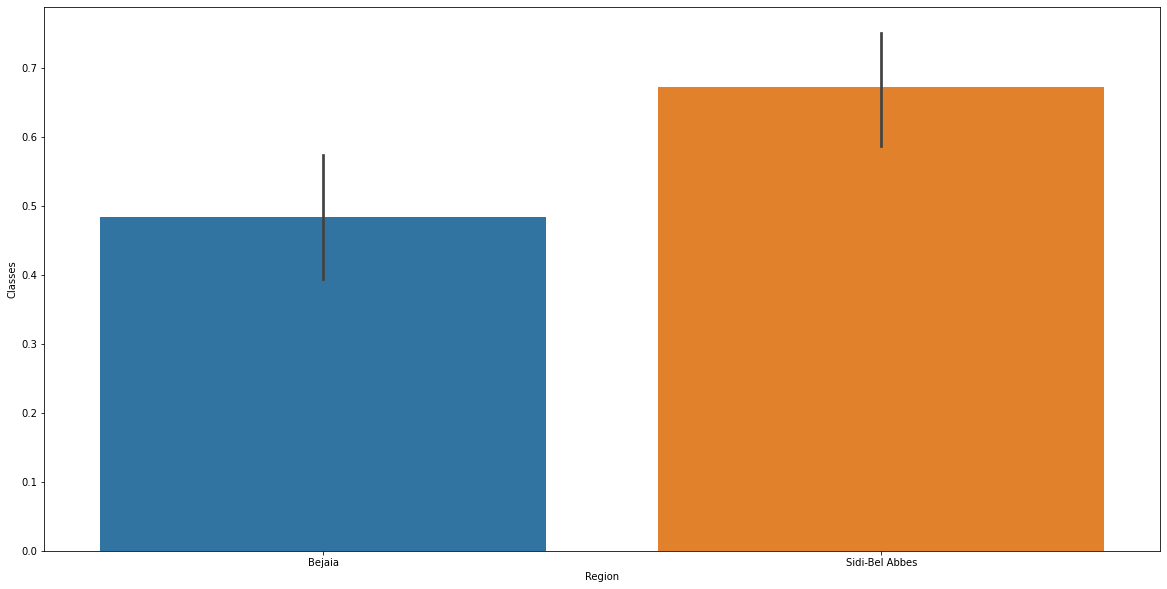

In [85]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Classes",data=df)

<AxesSubplot:xlabel='Region', ylabel='Rain'>

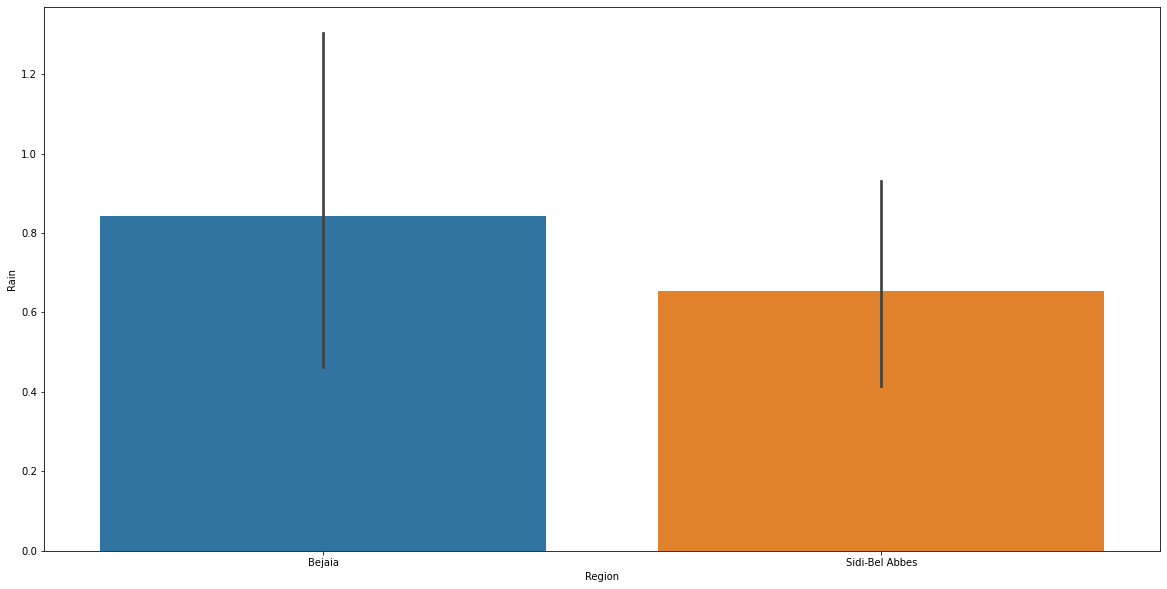

In [86]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Rain",data=df)
#Here there is lots of the

# Analytics between temperature ,Region and fires

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

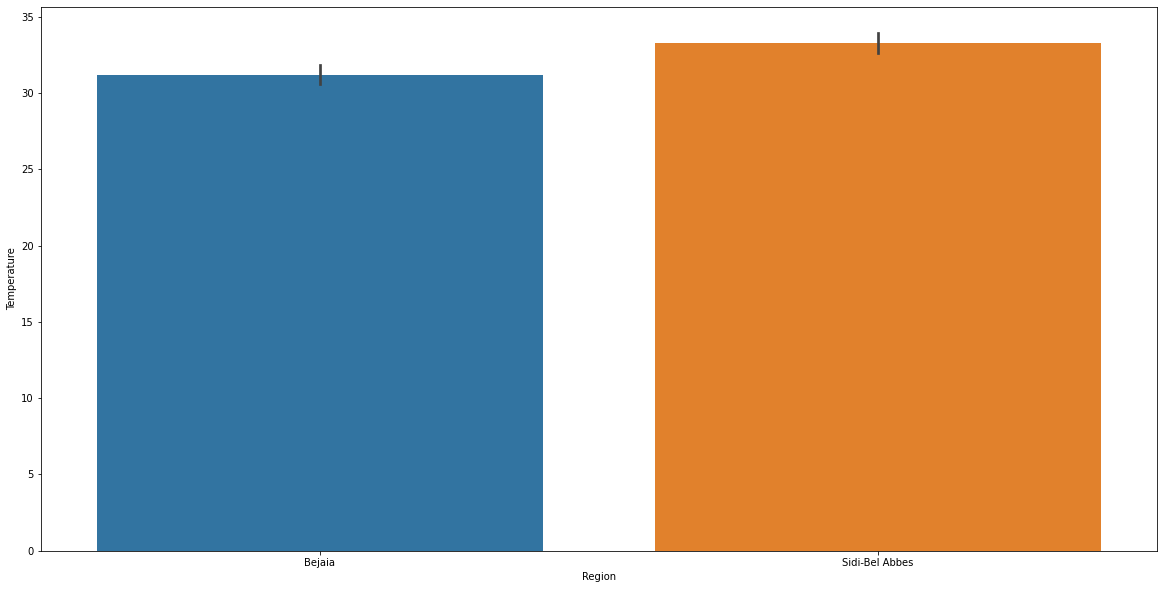

In [87]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Region",y="Temperature",data=df)

In [88]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,Classes
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,32.193277,61.810924,15.567227,0.750420,78.163445,14.929832,0.575630
std,3.663660,14.986420,2.810787,2.010558,14.249346,12.410727,0.495289
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.625000,6.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.850000,11.600000,1.000000
75%,35.000000,73.750000,17.000000,0.475000,88.525000,20.900000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,1.000000


In [89]:
#Here we can see that in bar plot for temperature there is not more difference in both th region

<AxesSubplot:xlabel='Temperature', ylabel='count'>

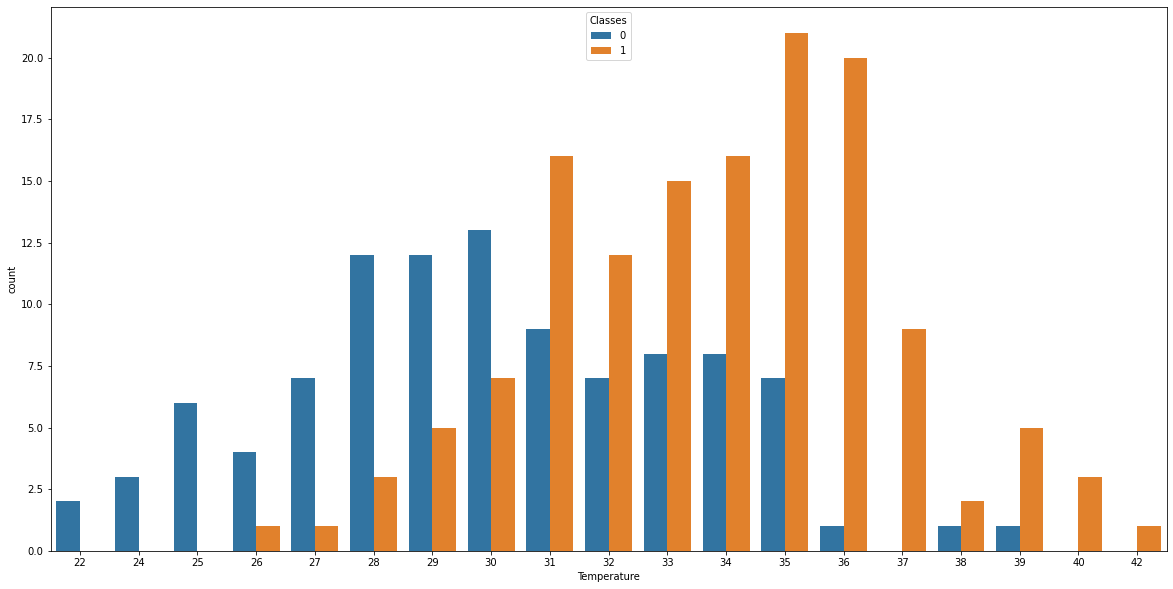

In [90]:
sns.countplot(x='Temperature',hue='Classes',data=df)

# Multivariate Analysis

 Multivariate analysis is the analysis of more than one variable.

In [91]:
df[(list(df.columns)[1:])].corr()

,RH,Ws,Rain,FFMC,DMC,Classes
RH,1.000000,0.245663,0.217008,-0.641586,-0.401411,-0.429806
Ws,0.245663,1.000000,0.177171,-0.184104,-0.019513,-0.080954
Rain,0.217008,0.177171,1.000000,-0.541662,-0.286788,-0.379260
FFMC,-0.641586,-0.184104,-0.541662,1.000000,0.598912,0.770704
DMC,-0.401411,-0.019513,-0.286788,0.598912,1.000000,0.578807
Classes,-0.429806,-0.080954,-0.379260,0.770704,0.578807,1.000000


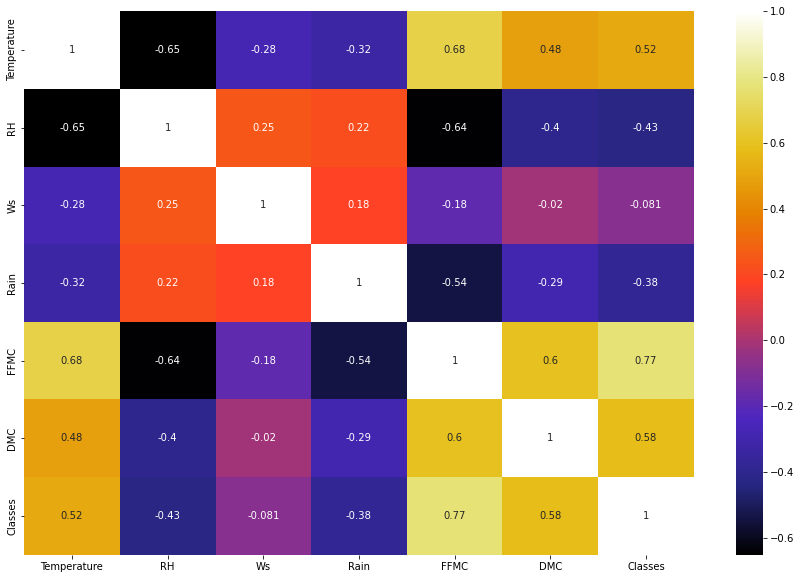

In [96]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()